In [1]:
import pandas as pd

In [2]:
df_url= 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
df= pd.read_csv(df_url)
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [3]:
X= df.drop(['logS'], axis=1)
X.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.5954,167.850,0.0,0.0
1,2.3765,133.405,0.0,0.0
2,2.5938,167.850,1.0,0.0
3,2.0289,133.405,1.0,0.0
4,2.9189,187.375,1.0,0.0


In [4]:
Y= df.iloc[:,-1]
Y.head()

0   -2.18
1   -2.00
2   -1.74
3   -1.48
4   -3.04
Name: logS, dtype: float64

# Linear Regression Model

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
model= linear_model.LinearRegression()
model.fit(X,Y)

LinearRegression()

In [8]:
Y_pred= model.predict(X)
Y_pred

array([-2.77628837, -2.38661054, -2.77190108, ..., -4.73721496,
       -4.19663007, -2.61784284])

# Model Performance

In [9]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y, Y_pred))

Coefficients: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.25650068309971985
Mean Squared Error (MSE): 1.01
Coefficient of determination (R^2): 0.77


# Model Equation

In [10]:
print('LogS = %.2f %.2f LogP %.4f MW + %.4f RB %.2f AP' % (model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3] ) )

LogS = 0.26 -0.74 LogP -0.0066 MW + 0.0032 RB -0.42 AP


# Data Visualization (Experimental vs Predicted LogS for Training Data)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental LogS')

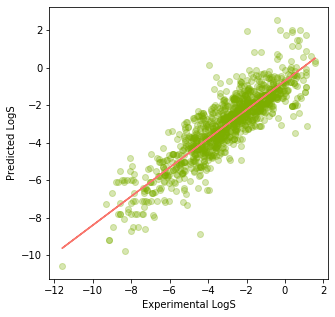

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs

z= np.polyfit(Y, Y_pred, 1)
p= np.poly1d(z)

plt.plot(Y, p(Y), "#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

In [14]:
import pickle

In [15]:
pickle.dump(model, open('solubility_model.pkl','wb'))